# FEVRC

# Libraries

In [212]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob, os

# Import

In [213]:
'''Connects to Google Drive to load in data'''

'''
# Connect to and mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Find the dataset in google drive and assign path to variable called 'Match'
fueleconomy = glob.glob('/content/drive/MyDrive/**/cleanedfueleconomy.pkl', recursive=True)
registrations = glob.glob('/content/drive/MyDrive/**/cleanedregistrations.pkl', recursive=True)
consumption = glob.glob('/content/drive/MyDrive/**/cleanedconsumption.pkl', recursive=True)
print("Found paths:", fueleconomy, registrations, consumption)

# Using 'Match' load in the dataset using the path and skip the first 2 rows
path = fueleconomy[0]
fueleconomy = pd.read_pickle(path)
path = registrations[0]
registrations = pd.read_pickle(path)
path = consumption[0]
consumption = pd.read_pickle(path)
'''

# '''
fueleconomy = pd.read_pickle("../FuelEconomy/cleanedfueleconomy.pkl")
registrations = pd.read_pickle("../VehicleRegistrations/cleanedregistrations.pkl")
consumption = pd.read_pickle("../FuelConsumption/cleanedconsumption.pkl")
# '''

# Verify Data

In [214]:
consumption.info()
print("\n")
fueleconomy.info()
print("\n")
registrations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    27 non-null     int64  
 1   AnnualConsumption(Millions of Gallons)  27 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 564.0 bytes


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 7 to 33
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            27 non-null     int64  
 1   Car             27 non-null     float64
 2   Car SUV         27 non-null     float64
 3   Pickup truck    27 non-null     float64
 4   Van             27 non-null     float64
 5   Truck SUV       27 non-null     float64
 6   AvgFuelEconomy  27 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.7 KB


<class 'pan

# Merge

In [215]:
# Merge all three datasets together
merged_df = pd.merge(fueleconomy, registrations, on='Year', how='inner')
merged_df = pd.merge(merged_df, consumption, on='Year', how='inner')
merged_df

,Year,Car,Car SUV,Pickup truck,Van,Truck SUV,AvgFuelEconomy,Automobile_Registrations,Motorcycle_Registrations,Licensed_Drivers,TotalRegistrations,AnnualConsumption(Millions of Gallons)
0,1995,23.44,17.81,16.89,18.08,16.00,18.44,1.360660e+08,3767029.00,1.766285e+08,139833074.0,119400.0
1,1996,23.33,18.43,17.15,18.34,16.23,18.70,1.297283e+08,3871237.14,1.795393e+08,133599578.0,121294.0
2,1997,23.37,19.23,16.84,18.18,16.13,18.75,1.297487e+08,3826373.00,1.827092e+08,133575077.0,122898.0
3,1998,23.37,18.24,17.00,18.70,16.16,18.69,1.318385e+08,3879450.00,1.848610e+08,135717988.0,126525.0
4,1999,23.00,18.51,16.29,18.28,16.07,18.43,1.324320e+08,4152433.00,1.871704e+08,136584477.0,129244.0
5,2000,22.91,17.89,16.65,18.61,16.01,18.41,1.336214e+08,4346068.00,1.906250e+08,137967488.0,130233.0
6,2001,23.05,18.83,15.95,18.04,16.41,18.46,1.376335e+08,4903056.00,1.912757e+08,142536523.0,131992.0
7,2002,23.08,19.30,15.75,18.70,16.31,18.63,1.359207e+08,5004156.00,1.942956e+08,140924833.0,135637.0
8,2003,23.28,19.91,16.08,18.98,16.42,18.93,1.356699e+08,5370035.00,1.961657e+08,141039932.0,136972.0
9,2004,23.14,19.97,15.74,19.16,16.47,18.90,1.364307e+08,5780870.00,1.988889e+08,142211521.0,139968.0


# Correlation Matrix

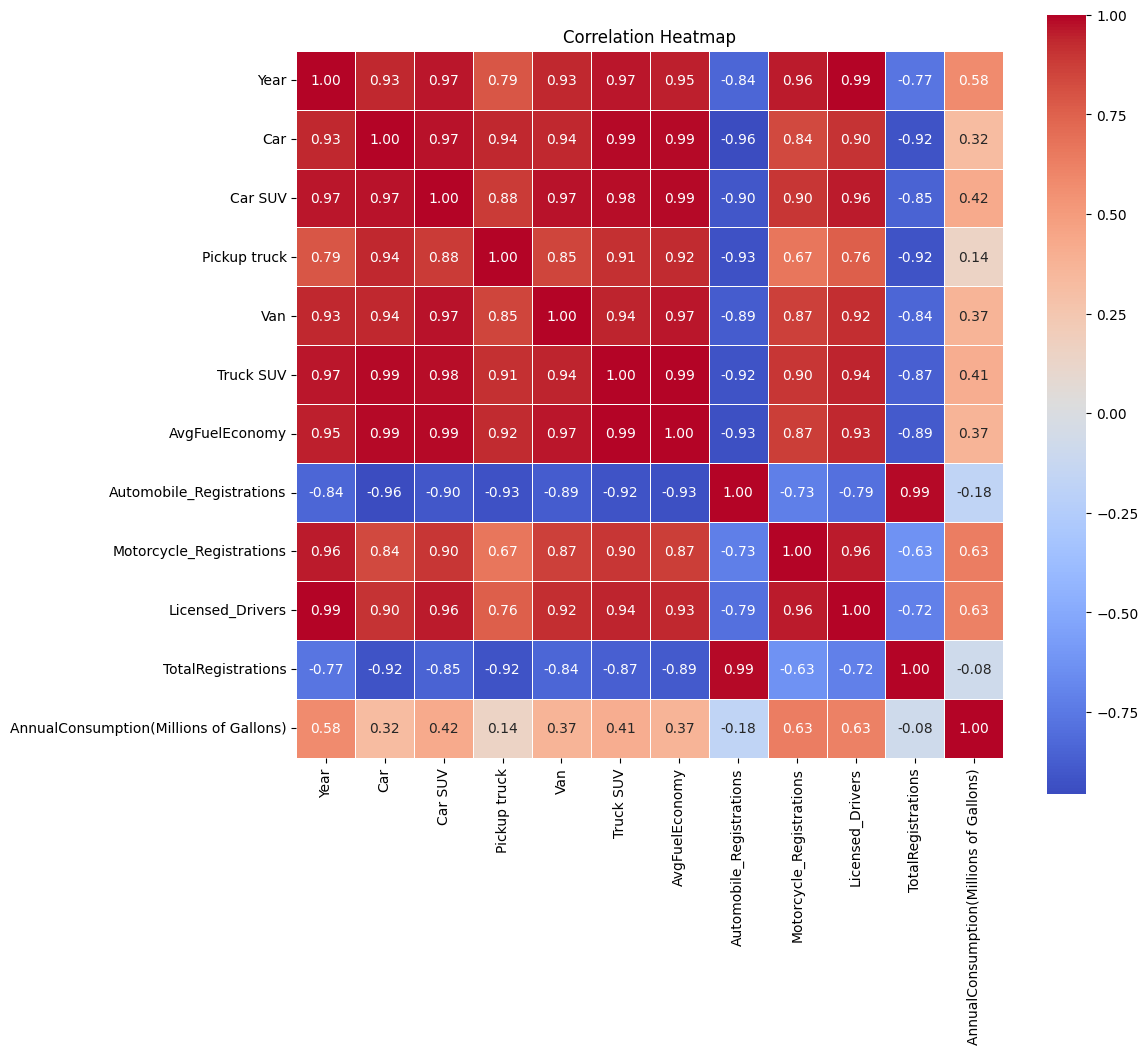

In [216]:
# If not already sorted:
df = merged_df.sort_values("Year").reset_index(drop=True)

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Display the correlation matrix
# print("Correlation Matrix:")
# print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

- Will use licensed drivers, and avg fuel economy as predictor variables
- can explore adding one vehicle class at a time or motorcycle registrations

# Multiple Linear Regression

In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [218]:
# Sort by year and split manually
df = df.sort_values('Year')

# Use 1995–2019 for training, 2020–2021 for testing
train_df = df[df['Year'] <= 2019]
test_df  = df[df['Year'] > 2019]
X_train = train_df[['Licensed_Drivers', 'AvgFuelEconomy']]
y_train = train_df['AnnualConsumption(Millions of Gallons)']

X_test = test_df[['Licensed_Drivers', 'AvgFuelEconomy']]
y_test = test_df['AnnualConsumption(Millions of Gallons)']

# Refit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output the evaluation metrics
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score:", r2)
print("RMSE:", rmse)

Model Coefficients: [ 8.80837035e-04 -3.66868582e+03]
Intercept: 31615.38860647868
R^2 Score: -3.3505621801521484
RMSE: 11901.575538831159


In [219]:
# Extract actual 2021 values from your DataFrame
actual_2021 = df[df['Year'] == 2021]
drivers_2021 = actual_2021['Licensed_Drivers'].values[0]
fe_2021 = actual_2021['AvgFuelEconomy'].values[0]

# Create prediction input
X_2021 = np.array([[drivers_2021, fe_2021]])
pred_2021 = model.predict(X_2021)

print(f"Predicted 2021 Fuel Consumption: {pred_2021[0]:,.2f} Million Gallons")
print(f"Actual 2021 Fuel Consumption: {actual_2021['AnnualConsumption(Millions of Gallons)'].values[0]:,.2f} Million Gallons")

Predicted 2021 Fuel Consumption: 139,914.97 Million Gallons
Actual 2021 Fuel Consumption: 135,145.00 Million Gallons


/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


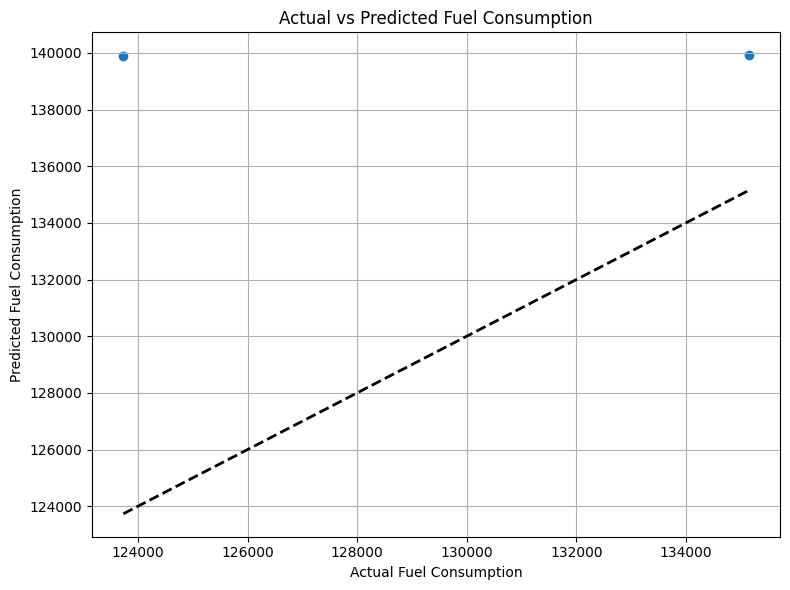

In [220]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Fuel Consumption")
plt.ylabel("Predicted Fuel Consumption")
plt.title("Actual vs Predicted Fuel Consumption")
plt.grid(True)
plt.tight_layout()
plt.show()

# PCA

In [221]:
features_for_pca = [
    'Car', 'Car SUV', 'Pickup truck', 'Van', 'Truck SUV',
    'AvgFuelEconomy',
    'Automobile_Registrations', 'Motorcycle_Registrations',
    'Licensed_Drivers', 'TotalRegistrations'
]

from sklearn.preprocessing import StandardScaler

# Extract the feature set
X_pca = df[features_for_pca].copy()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

In [222]:
from sklearn.decomposition import PCA

# Apply PCA (keep all components initially)
pca = PCA()
X_pca_transformed = pca.fit_transform(X_scaled)

# Check explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Display variance explained
for i, var in enumerate(cumulative_variance):
    print(f"PC{i+1}: {var:.4f} cumulative variance explained")

PC1: 0.9081 cumulative variance explained
PC2: 0.9741 cumulative variance explained
PC3: 0.9852 cumulative variance explained
PC4: 0.9936 cumulative variance explained
PC5: 0.9973 cumulative variance explained
PC6: 0.9991 cumulative variance explained
PC7: 0.9998 cumulative variance explained
PC8: 1.0000 cumulative variance explained
PC9: 1.0000 cumulative variance explained
PC10: 1.0000 cumulative variance explained


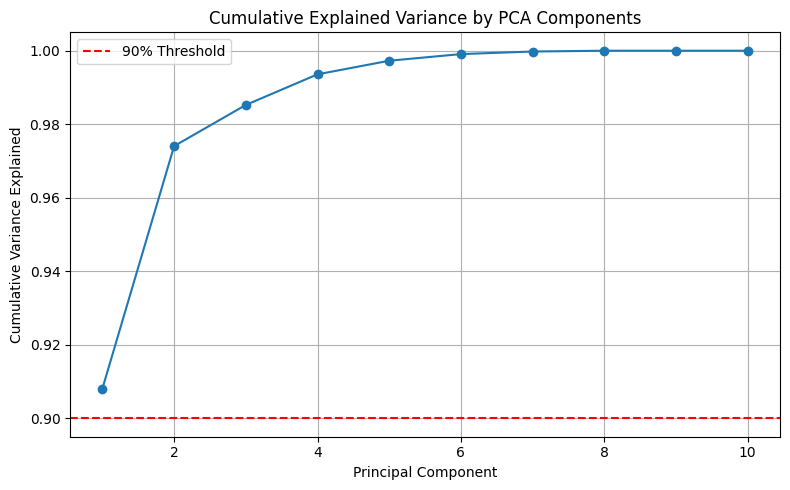

In [223]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

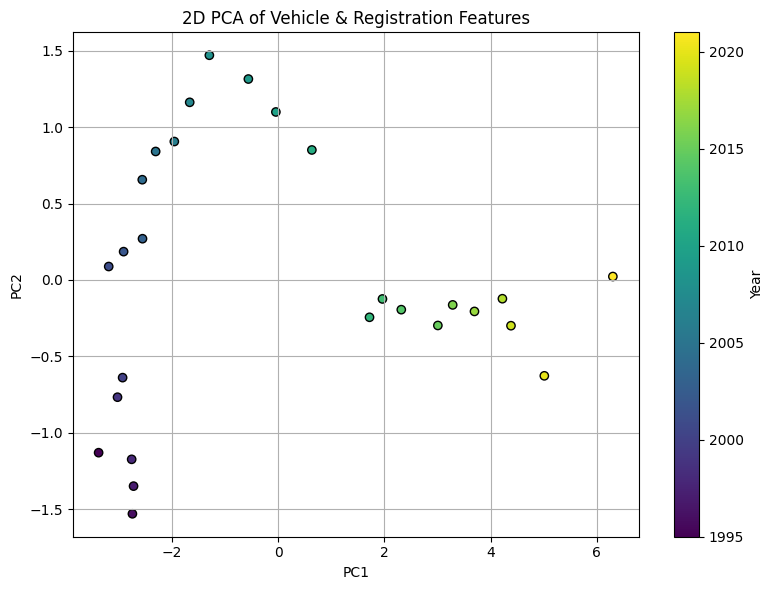

In [224]:
# Reduce to 2 components for visualization
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=df['Year'], cmap='viridis', edgecolor='k')
plt.title('2D PCA of Vehicle & Registration Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [225]:
# Use only first 2 PCs
X_pca_2 = X_pca_transformed[:, :2]

# Train/test split (time-aware)
X_train_pca = X_pca_2[:22]       # 1995–2016 (22 years)
X_test_pca  = X_pca_2[22:25]     # 2017–2019 (3 years)

# Match y to PCA splits
y_train_pca = y[:22]             # same years as PCA train
y_test_pca  = y[22:25]           # same years as PCA test

# Train model
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)

# Predict
y_pred_pca = model_pca.predict(X_test_pca)

# Evaluate
r2_pca = r2_score(y_test_pca, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))

print("PCA Model Coefficients:", model_pca.coef_)
print("PCA Model Intercept:", model_pca.intercept_)
print("PCA R^2 Score:", r2_pca)
print("PCA RMSE:", rmse_pca)

PCA Model Coefficients: [1124.2443279  5586.57021249]
PCA Model Intercept: 135285.7162752663
PCA R^2 Score: -977.2797258569963
PCA RMSE: 4191.984019270816


# ARIMAX (?)

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [227]:
df_ts = df[['Year', 'AnnualConsumption(Millions of Gallons)', 'Licensed_Drivers', 'AvgFuelEconomy']].copy()
df_ts.set_index('Year', inplace=True)

# Convert Year column to datetime index
df_ts['Year'] = pd.to_datetime(df_ts.index, format='%Y')
df_ts.set_index('Year', inplace=True)

y = df_ts['AnnualConsumption(Millions of Gallons)']
X_exog = df_ts[['Licensed_Drivers', 'AvgFuelEconomy']]

# TRAIN: 1995–2016
y_train = y[:'2016-12-31']
X_train = X_exog[:'2016-12-31']

# TEST: 2017–2019
y_test = y['2017-01-01':'2019-12-31']
X_test = X_exog['2017-01-01':'2019-12-31']

model_arimax = SARIMAX(
    y_train,
    exog=X_train,
    order=(1, 1, 1),  # AR, differencing, MA terms
    enforce_stationarity=False,
    enforce_invertibility=False
)

results_arimax = model_arimax.fit(disp=False)


/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [228]:
# Predict for 2017–2019
start = len(y_train)        # 2017
end = len(y_train) + len(y_test) - 1   # 2019

forecast_arimax = results_arimax.predict(
    start=start,
    end=end,
    exog=X_test
)

# Evaluation
from sklearn.metrics import r2_score, mean_squared_error

r2_arimax = r2_score(y_test, forecast_arimax)
rmse_arimax = np.sqrt(mean_squared_error(y_test, forecast_arimax))

print(f"ARIMAX R²: {r2_arimax:.4f}")
print(f"ARIMAX RMSE: {rmse_arimax:,.2f}")

ARIMAX R²: -3344.4775
ARIMAX RMSE: 7,752.06


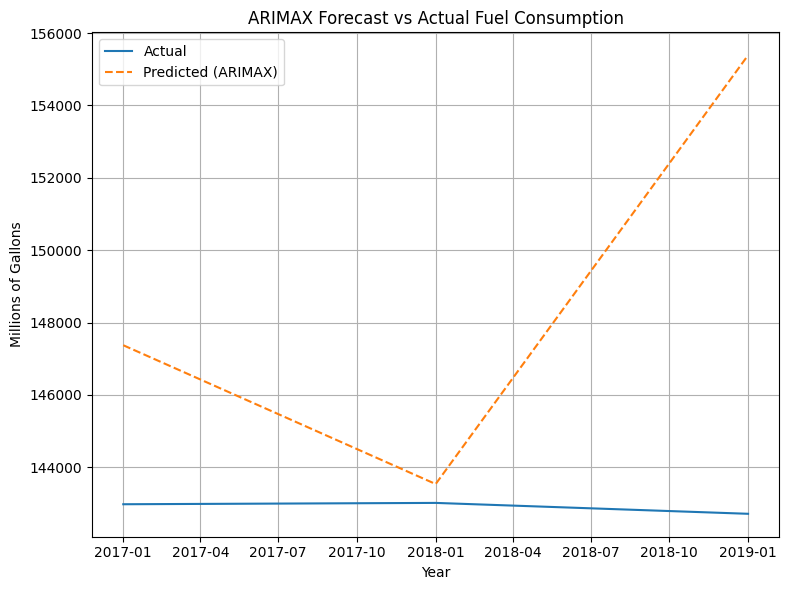

In [229]:
plt.figure(figsize=(8,6))
plt.plot(y_test, label='Actual')
plt.plot(forecast_arimax, label='Predicted (ARIMAX)', linestyle='--')
plt.title('ARIMAX Forecast vs Actual Fuel Consumption')
plt.ylabel('Millions of Gallons')
plt.xlabel('Year')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# XGBoost

In [230]:
import xgboost as xgb

In [231]:
# Prepare data for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost regression parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',         # Root Mean Squared Error
    'eta': 0.1,                    # Learning rate
    'max_depth': 4,                # Tree depth
    'seed': 42
}

# Train the model
model_xgb = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=[(dtrain, "train"), (dtest, "test")],
    verbose_eval=False
)

In [232]:
# Predict
y_pred_xgb = model_xgb.predict(dtest)

# Evaluate
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost R²: {r2:.4f}")
print(f"XGBoost RMSE: {rmse:.4f}")

XGBoost R²: -3.9695
XGBoost RMSE: 298.7738


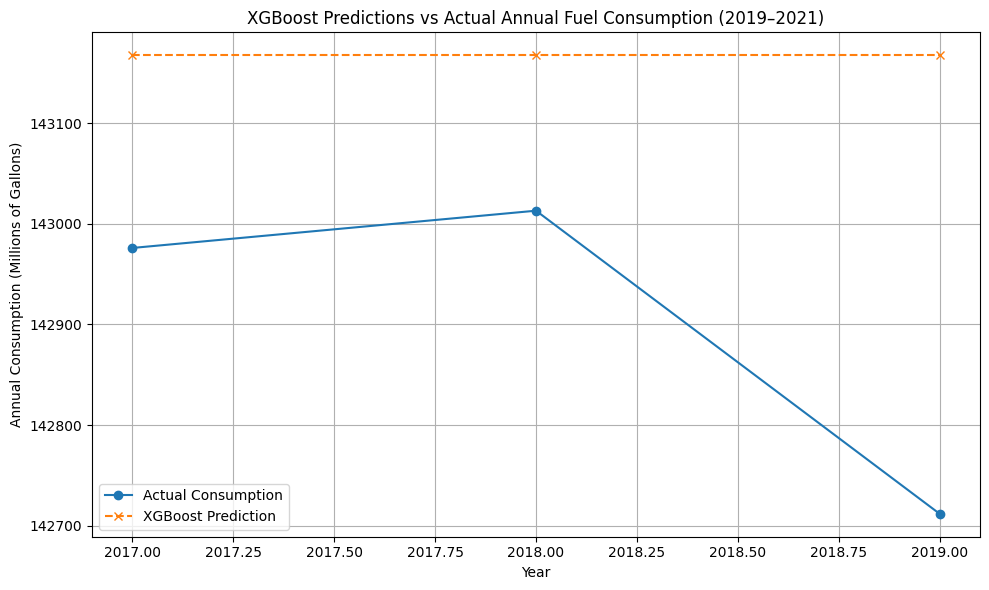

In [233]:
# Extract only the test years (e.g., last 3 years)
years_test = df['Year'].values[22:25]

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(years_test, y_test, marker='o', label='Actual Consumption')
plt.plot(years_test, y_pred_xgb, marker='x', linestyle='--', label='XGBoost Prediction')

plt.title('XGBoost Predictions vs Actual Annual Fuel Consumption (2019–2021)')
plt.xlabel('Year')
plt.ylabel('Annual Consumption (Millions of Gallons)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Walk-Forward Validation w/ XGBoost

In [234]:
from xgboost import XGBRegressor

# Ensure data is sorted
df = df.sort_values('Year')

# Store predictions and actuals
predictions = []
actuals = []
years = []

# Walk-forward from year 2000 to 2020
for year in range(2000, 2021):  # Ends testing on 2020
    train_df = df[df['Year'] < year]
    test_df = df[df['Year'] == year]
    
    if test_df.empty:
        continue  # Skip if no test data for this year

    X_train = train_df[['Licensed_Drivers', 'AvgFuelEconomy']]
    y_train = train_df['AnnualConsumption(Millions of Gallons)']
    X_test = test_df[['Licensed_Drivers', 'AvgFuelEconomy']]
    y_test = test_df['AnnualConsumption(Millions of Gallons)']

    # Train XGBoost model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    predictions.extend(y_pred)
    actuals.extend(y_test.values)
    years.extend(test_df['Year'].values)

# Final evaluation
r2 = r2_score(actuals, predictions)
rmse = np.sqrt(mean_squared_error(actuals, predictions))

print(f"Walk-Forward XGBoost R²: {r2:.4f}")
print(f"Walk-Forward XGBoost RMSE: {rmse:,.2f}")

Walk-Forward XGBoost R²: 0.0348
Walk-Forward XGBoost RMSE: 4,775.01


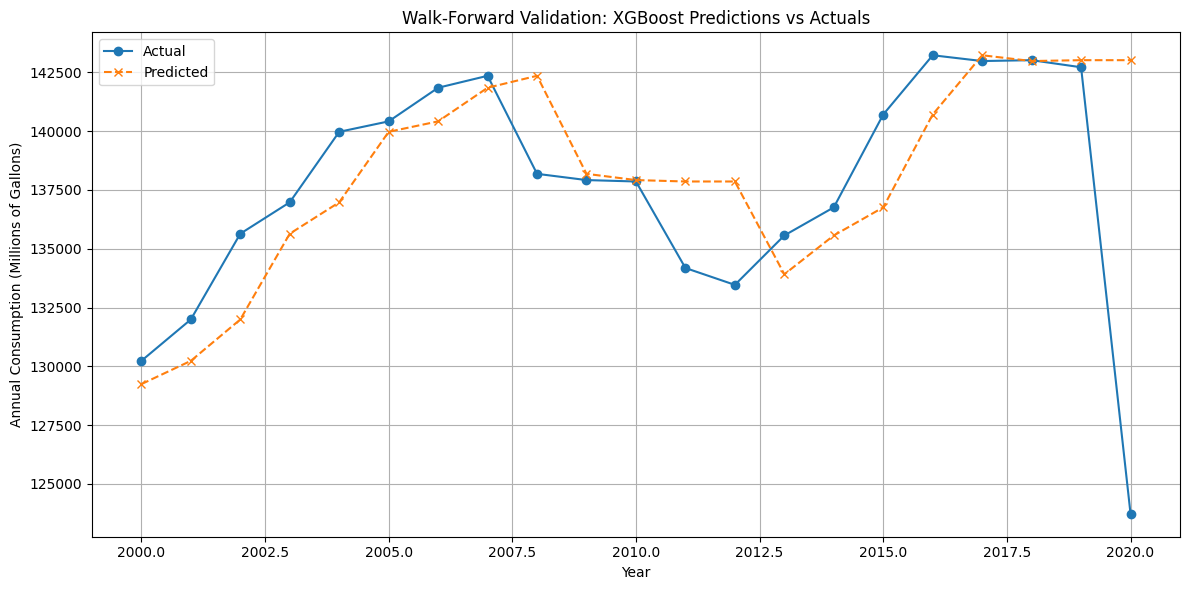

In [235]:
plt.figure(figsize=(12, 6))
plt.plot(years, actuals, marker='o', label='Actual')
plt.plot(years, predictions, marker='x', linestyle='--', label='Predicted')
plt.title('Walk-Forward Validation: XGBoost Predictions vs Actuals')
plt.xlabel('Year')
plt.ylabel('Annual Consumption (Millions of Gallons)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Lightweight GridSearch

In [236]:
from sklearn.model_selection import GridSearchCV

# Define a lightweight hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# Set up base model
xgb_base = XGBRegressor(objective='reg:squarederror', random_state=42)

# Use 3-fold CV for speed (you can increase to 5 later if needed)
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE (neg):", grid_search.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best RMSE (neg): -7706.394906165428


In [237]:
'''Re-Running Walk-Forward Validation with Best Hyperparameters'''

# Ensure data is sorted by year
df = df.sort_values('Year')

# Lists to collect results
predictions = []
actuals = []
years = []

# Walk-forward from year 2000 to 2020 (predicting one year at a time)
for year in range(2000, 2021):
    train_df = df[df['Year'] < year]
    test_df = df[df['Year'] == year]
    
    if test_df.empty:
        continue  # Skip if no data for this year

    # Split train/test
    X_train = train_df[['Licensed_Drivers', 'AvgFuelEconomy']]
    y_train = train_df['AnnualConsumption(Millions of Gallons)']
    X_test = test_df[['Licensed_Drivers', 'AvgFuelEconomy']]
    y_test = test_df['AnnualConsumption(Millions of Gallons)']

    # Train XGBoost with best params
    model = XGBRegressor(
        objective='reg:squarederror',
        learning_rate=0.1,
        max_depth=5,
        n_estimators=100,
        subsample=1.0,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Predict and store results
    y_pred = model.predict(X_test)
    predictions.extend(y_pred)
    actuals.extend(y_test.values)
    years.extend(test_df['Year'].values)

# Final evaluation
r2 = r2_score(actuals, predictions)
rmse = np.sqrt(mean_squared_error(actuals, predictions))

print(f"Walk-Forward XGBoost (Tuned) R²: {r2:.4f}")
print(f"Walk-Forward XGBoost (Tuned) RMSE: {rmse:.2f}")

Walk-Forward XGBoost (Tuned) R²: 0.0338
Walk-Forward XGBoost (Tuned) RMSE: 4777.44


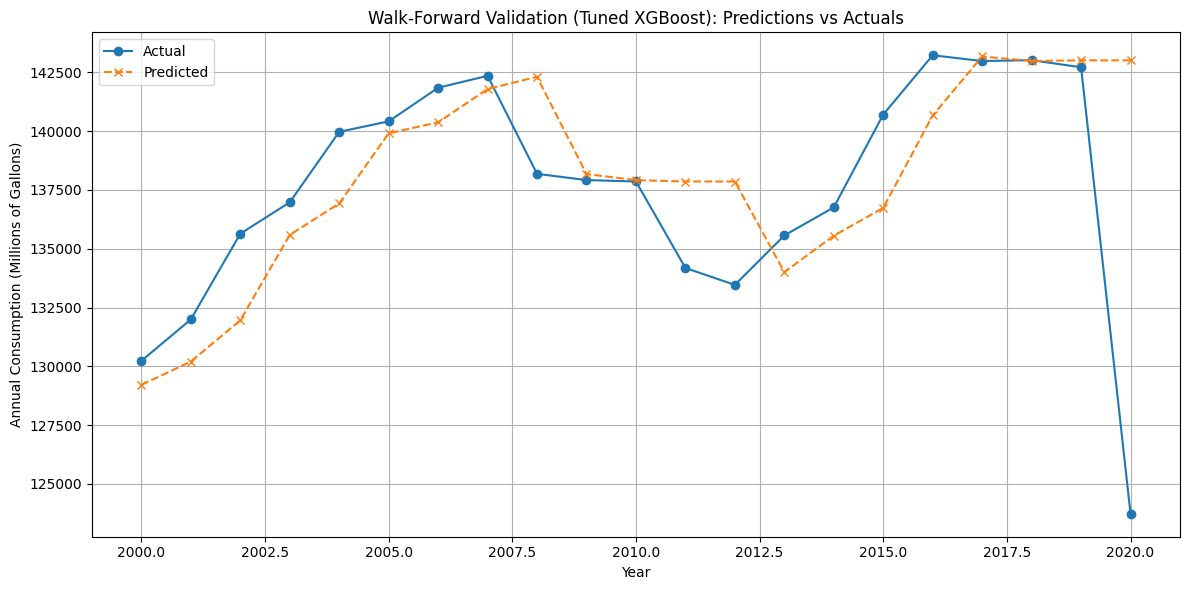

In [238]:
plt.figure(figsize=(12, 6))
plt.plot(years, actuals, marker='o', label='Actual')
plt.plot(years, predictions, marker='x', linestyle='--', label='Predicted')

plt.title('Walk-Forward Validation (Tuned XGBoost): Predictions vs Actuals')
plt.xlabel('Year')
plt.ylabel('Annual Consumption (Millions of Gallons)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Full XGBoost Grid Search

In [239]:
X_train = train_df[['Licensed_Drivers', 'AvgFuelEconomy']]
y_train = train_df['AnnualConsumption(Millions of Gallons)']

In [240]:
# Define a full hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up base model
xgb_base = XGBRegressor(objective='reg:squarederror', random_state=42)

# Use 5-fold cross-validation for better performance estimation
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("🔍 Best Parameters:", grid_search.best_params_)
print("✅ Best RMSE (neg):", grid_search.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
🔍 Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.6}
✅ Best RMSE (neg): -4579.147764111973


In [241]:
# Best parameters from full grid search
best_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 300,
    'subsample': 0.6
}

# Sort data by year
df = df.sort_values('Year')

# Store predictions and actuals
predictions = []
actuals = []
years = []

# Walk-forward from 2000 to 2020
for year in range(2000, 2021):  # Ends on 2020
    train_df = df[df['Year'] < year]
    test_df = df[df['Year'] == year]

    if test_df.empty:
        continue

    X_train = train_df[['Licensed_Drivers', 'AvgFuelEconomy']]
    y_train = train_df['AnnualConsumption(Millions of Gallons)']
    X_test = test_df[['Licensed_Drivers', 'AvgFuelEconomy']]
    y_test = test_df['AnnualConsumption(Millions of Gallons)']

    model = XGBRegressor(
        objective='reg:squarederror',
        **best_params
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    predictions.extend(y_pred)
    actuals.extend(y_test)
    years.extend(test_df['Year'].values)

# Evaluate
r2 = r2_score(actuals, predictions)
rmse = np.sqrt(mean_squared_error(actuals, predictions))

print(f"Walk-Forward XGBoost R²: {r2:.4f}")
print(f"Walk-Forward XGBoost RMSE: {rmse:,.2f}")

Walk-Forward XGBoost R²: 0.0348
Walk-Forward XGBoost RMSE: 4,775.03


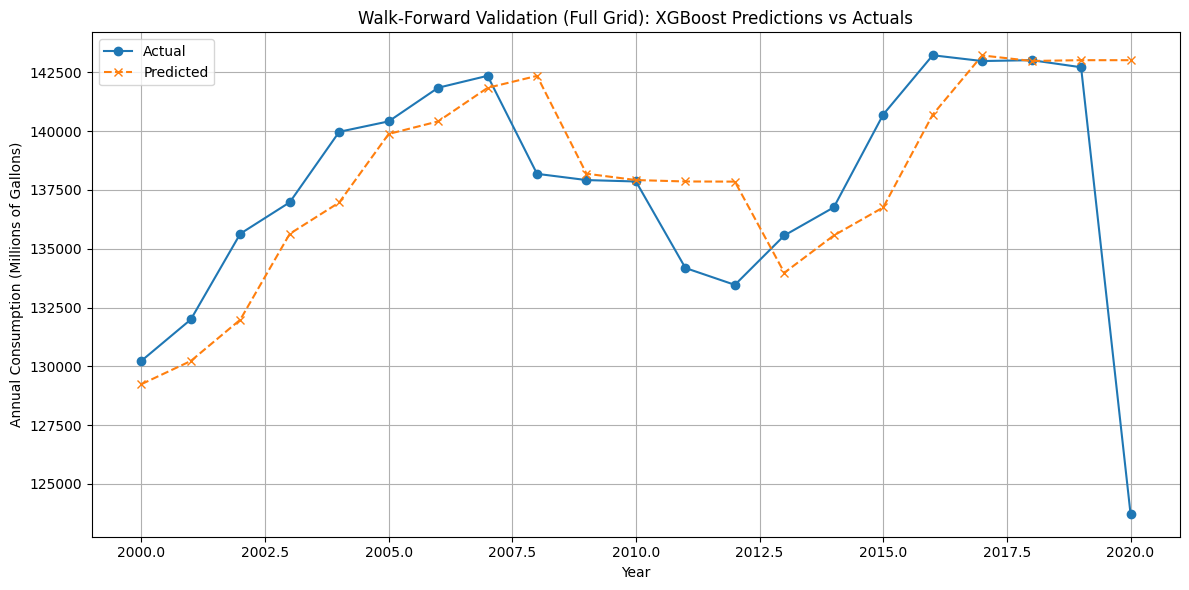

In [242]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(years, actuals, marker='o', label='Actual')
plt.plot(years, predictions, marker='x', linestyle='--', label='Predicted')
plt.title('Walk-Forward Validation (Full Grid): XGBoost Predictions vs Actuals')
plt.xlabel('Year')
plt.ylabel('Annual Consumption (Millions of Gallons)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Walk Forward Validation w/ Ridge Regression

In [243]:
from sklearn.linear_model import Ridge

# Store predictions and actuals
ridge_predictions = []
ridge_actuals = []
ridge_years = []

# Walk-forward loop
for year in range(2000, 2021):  # Predicting for each year
    train_df = df[df['Year'] < year]
    test_df = df[df['Year'] == year]
    
    if test_df.empty:
        continue

    X_train = train_df[['Licensed_Drivers', 'AvgFuelEconomy']]
    y_train = train_df['AnnualConsumption(Millions of Gallons)']
    X_test = test_df[['Licensed_Drivers', 'AvgFuelEconomy']]
    y_test = test_df['AnnualConsumption(Millions of Gallons)']
    
    # Ridge Regression Model
    model = Ridge(alpha=1.0)  # You can tune alpha later
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    ridge_predictions.extend(y_pred)
    ridge_actuals.extend(y_test)
    ridge_years.extend(test_df['Year'].values)

# Evaluation
r2 = r2_score(ridge_actuals, ridge_predictions)
rmse = np.sqrt(mean_squared_error(ridge_actuals, ridge_predictions))

print(f"Walk-Forward Ridge Regression R²: {r2:.4f}")
print(f"Walk-Forward Ridge Regression RMSE: {rmse:,.2f}")

Walk-Forward Ridge Regression R²: 0.0692
Walk-Forward Ridge Regression RMSE: 4,689.04


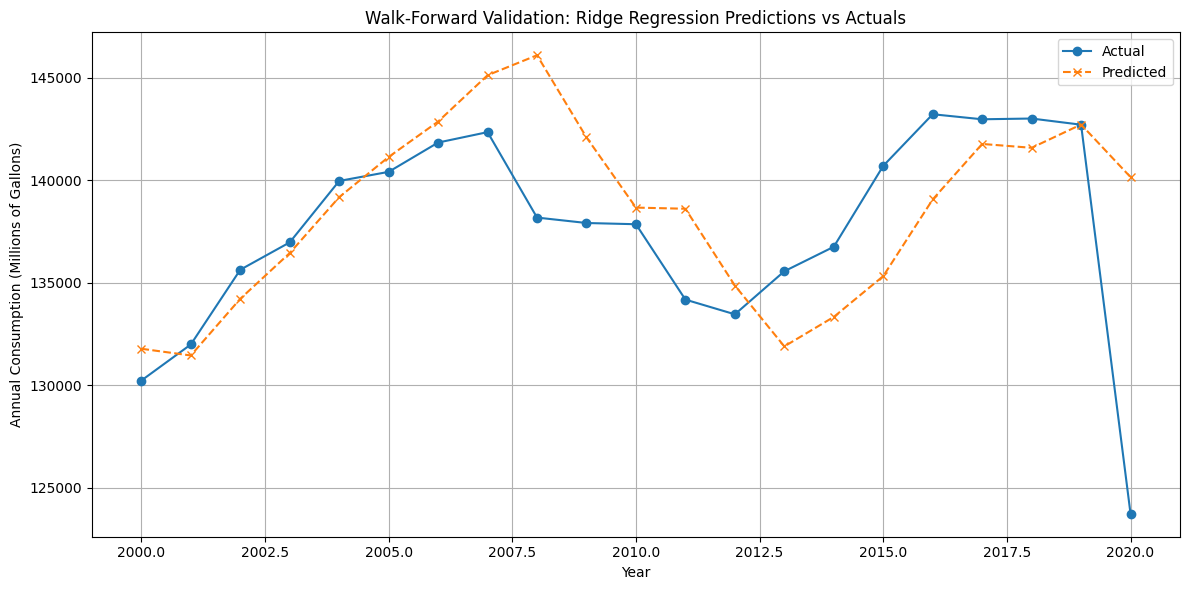

In [244]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(ridge_years, ridge_actuals, marker='o', label='Actual')
plt.plot(ridge_years, ridge_predictions, marker='x', linestyle='--', label='Predicted')

plt.title('Walk-Forward Validation: Ridge Regression Predictions vs Actuals')
plt.xlabel('Year')
plt.ylabel('Annual Consumption (Millions of Gallons)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Walk Forward Validation w/ Random Forest Regressor

In [245]:
from sklearn.ensemble import RandomForestRegressor

# Prepare containers
rf_predictions = []
rf_actuals = []
rf_years = []

# Ensure DataFrame is sorted
df = df.sort_values('Year')

# Walk-forward from 2000 to 2020 (ends testing on 2020)
for year in range(2000, 2021):
    train_df = df[df['Year'] < year]
    test_df = df[df['Year'] == year]

    if test_df.empty:
        continue

    X_train = train_df[['Licensed_Drivers', 'AvgFuelEconomy']]
    y_train = train_df['AnnualConsumption(Millions of Gallons)']
    X_test = test_df[['Licensed_Drivers', 'AvgFuelEconomy']]
    y_test = test_df['AnnualConsumption(Millions of Gallons)']

    # Train Random Forest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rf_predictions.extend(y_pred)
    rf_actuals.extend(y_test)
    rf_years.extend(test_df['Year'].values)

# Final evaluation
rf_r2 = r2_score(rf_actuals, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(rf_actuals, rf_predictions))

print(f"Walk-Forward Random Forest R²: {rf_r2:.4f}")
print(f"Walk-Forward Random Forest RMSE: {rf_rmse:,.2f}")

Walk-Forward Random Forest R²: -0.0991
Walk-Forward Random Forest RMSE: 5,095.41


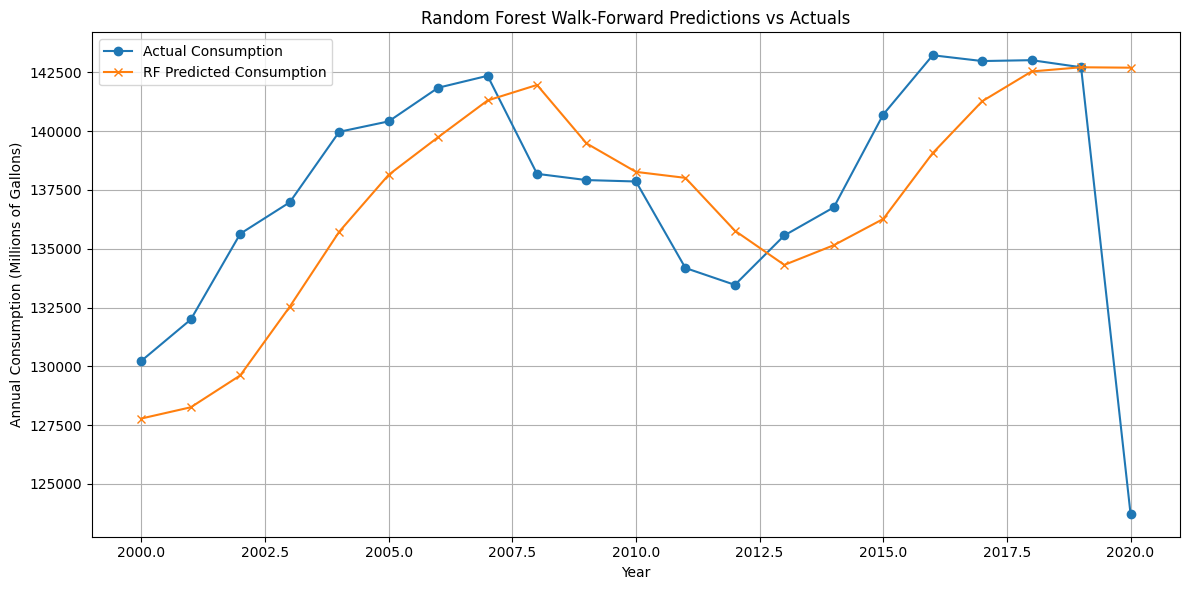

In [246]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(rf_years, rf_actuals, label='Actual Consumption', marker='o')
plt.plot(rf_years, rf_predictions, label='RF Predicted Consumption', marker='x')
plt.title('Random Forest Walk-Forward Predictions vs Actuals')
plt.xlabel('Year')
plt.ylabel('Annual Consumption (Millions of Gallons)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Grid Search w/ Random Forest

In [247]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize base model
rf_base = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search_rf.fit(X_train, y_train)

# Output best params and score
print("✅ Best RF Parameters:", grid_search_rf.best_params_)
print("✅ Best RF RMSE (neg):", grid_search_rf.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best RF Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
✅ Best RF RMSE (neg): -5444.640913673627


In [248]:
# Ensure data is sorted
df = df.sort_values('Year')

# Store predictions, actuals, and years
rf_predictions = []
rf_actuals = []
rf_years = []

# Plug in the best hyperparameters here
best_params = grid_search_rf.best_params_

# Walk-forward from 2000 to 2020 (predicting one year at a time)
for year in range(2000, 2021):
    train_df = df[df['Year'] < year]
    test_df = df[df['Year'] == year]

    if test_df.empty:
        continue

    X_train = train_df[['Licensed_Drivers', 'AvgFuelEconomy']]
    y_train = train_df['AnnualConsumption(Millions of Gallons)']
    X_test = test_df[['Licensed_Drivers', 'AvgFuelEconomy']]
    y_test = test_df['AnnualConsumption(Millions of Gallons)']

    # Use best RF model
    model = RandomForestRegressor(**best_params, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rf_predictions.extend(y_pred)
    rf_actuals.extend(y_test)
    rf_years.extend(test_df['Year'].values)

# Evaluate performance
r2 = r2_score(rf_actuals, rf_predictions)
rmse = np.sqrt(mean_squared_error(rf_actuals, rf_predictions))

print(f"Walk-Forward Tuned RF R²: {r2:.4f}")
print(f"Walk-Forward Tuned RF RMSE: {rmse:,.2f}")

Walk-Forward Tuned RF R²: -0.1110
Walk-Forward Tuned RF RMSE: 5,122.82


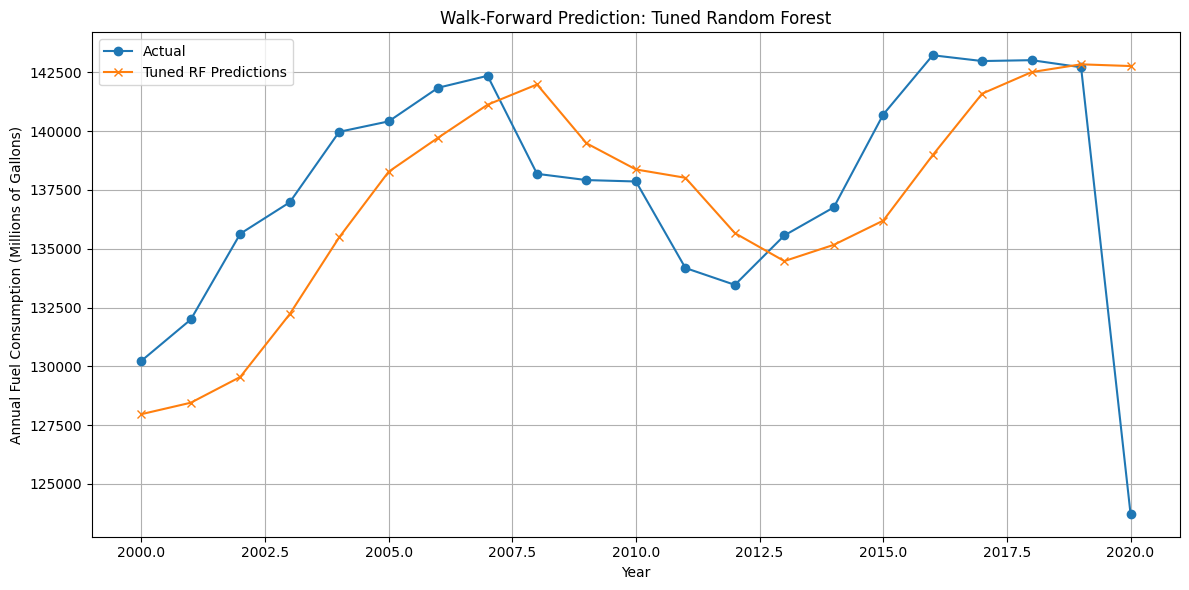

In [249]:
plt.figure(figsize=(12, 6))
plt.plot(rf_years, rf_actuals, label='Actual', marker='o')
plt.plot(rf_years, rf_predictions, label='Tuned RF Predictions', marker='x')

plt.title("Walk-Forward Prediction: Tuned Random Forest")
plt.xlabel("Year")
plt.ylabel("Annual Fuel Consumption (Millions of Gallons)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cleaning Summary

In [250]:
import pandas as pd

# Replace these values with your actual results
model_results = {
    "Model": [
        "Multiple Linear Regression",
        "Principal Component Analysis",
        "ARIMAX",
        "XGBoost",
        "Walk-Forward W/ XGBoost",
        "Lightweight GridSearch W/ XGBoost",
        "Full GridSearch W/ XGBoost",
        "Walk Forward Validation W/ Ridge Regression",
        "Walk Forward Validation W/ Random Forest Regressor",
        "Grid Search W/ Random Forest",
    ],
    "R²": [
        -3.3506,
        -4.5531,
        -5.3952,
        -5.5824,
        0.0348,
        0.0338,
        0.0348,
        0.0692,
        -0.0991,
        -0.111
    ],
    "RMSE": [
        11901.58,
        13446.22,
        14429.77,
        14639.42,
        4775.01,
        4777.44,
        4775.03,
        4689.04,
        5095.41,
        5122.82
    ]
}

model_df = pd.DataFrame(model_results)
model_df = model_df.sort_values(by="R²", ascending=False)

print(model_df)

                                               Model      R²      RMSE
7        Walk Forward Validation W/ Ridge Regression  0.0692   4689.04
4                            Walk-Forward W/ XGBoost  0.0348   4775.01
6                         Full GridSearch W/ XGBoost  0.0348   4775.03
5                  Lightweight GridSearch W/ XGBoost  0.0338   4777.44
8  Walk Forward Validation W/ Random Forest Regre... -0.0991   5095.41
9                       Grid Search W/ Random Forest -0.1110   5122.82
0                         Multiple Linear Regression -3.3506  11901.58
1                       Principal Component Analysis -4.5531  13446.22
2                                             ARIMAX -5.3952  14429.77
3                                            XGBoost -5.5824  14639.42


# Export

In [251]:
# Save as CSV
fueleconomy.to_csv("FEVRC_Dataset.csv", index=False)

# Optional: Save as Pickle for faster loading
fueleconomy.to_pickle("FEVRC_Dataset.pkl")
